# Flower Images Classification Using Deep Learning


---


## 1. Topic
- Project topic: Flower Image Classification Using Deep Learning
- Topic Description: Creating a program that helps us quickly and easily know the names of flowers around us that we may pass by.


## 2. Define the problem
- There are times when we wonder about the names of unknown flowers around us, at least once in a while. However, flowers are often hard to find even by their name when searching for simple outward shape or color. Most of the cases can be found by a botanist with a deep understanding of plants or by doing a lot of searches equivalent to that. I chose the subject with this idea, thinking how convenient it would be if anyone could quickly and easily know the name of the flower from a single photo, even without the knowledge of a botanist.
- Also, I wanted to implement 'flower image classification', which can be the beginning of Naver's Smart Lens, which is currently widely used, and various related apps.

## 3. Introduction to data
- Flowers Recognition data
- Data is divided into a total of 5 categories (daisy, dandelion, rose, sunflower, tulip) and consists of a total of 4317 images.
- source : https://www.kaggle.com/alxmamaev/flowers-recognition 

## 4. Reasons for data selection
- It was selected because it was thought to be data that could make the most of limited resources and time.

## 5. Establish hypotheses using data
>Hypothesis 1: Deep learning can classify flower images into 5 classes, and the accuracy is over 70%.

>Hypothesis 2: There are differences in the results after applying various transfer learning models.

## 6. Order of Content


1.   Loading the data
2.   Data Preprocessing
3.   Applying Deep Learning Models
4.   Chance Level & Base Line
5.   Hypothesis Testing
6.   Limitations and future solutions and growth plans






#1. Loading the data


---



In [2]:
# Import dependencies

import os
import cv2
import random 
import matplotlib.image as mpimg
import seaborn as sns
sns.set_theme(style="darkgrid")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from skimage.transform import resize
import random as rn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, AlphaDropout, GlobalAveragePooling2D
from functools import partial
from tensorflow.keras.models import Model

In [3]:
# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Set the directories
DATA_DIR = '/content/drive/MyDrive/flowers'
CATEGORIES = ['rose','daisy','dandelion', 'sunflower','tulip']

In [6]:
# Check the number of files in each category.
total = 0
for category in CATEGORIES: 
    img_count = len([img for img in os.listdir(os.path.join(DATA_DIR, category))])
    total += img_count
    print(category,img_count)

print('-------------------------')
print('total :', total , 'images')  

rose 784
daisy 764
dandelion 1052
sunflower 733
tulip 984
-------------------------
total : 4317 images


- We confirmed that there are about 800 image data on average for each category.
- You can see that the data are relatively evenly distributed for each category.

In [7]:
#Path of each folder contains the images
rose_path = os.path.join(DATA_DIR,'rose')
daisy_path = os.path.join(DATA_DIR,'daisy')
dandelion_path = os.path.join(DATA_DIR,'dandelion')
sunflower_path = os.path.join(DATA_DIR,'sunflower')
tulip_path = os.path.join(DATA_DIR,'tulip')

#Initializating an empty lists to store the images
daisy =  []
dandelion = []
rose = []
sunflower = []
tulip = []


for img in os.listdir(rose_path):
    img_array = cv2.imread(os.path.join(rose_path,img)) 
    rose.append(img_array)

for img in os.listdir(daisy_path):
    img_array = cv2.imread(os.path.join(daisy_path,img)) 
    daisy.append(img_array)

for img in os.listdir(dandelion_path):
    img_array = cv2.imread(os.path.join(dandelion_path,img)) 
    dandelion.append(img_array)

for img in os.listdir(sunflower_path):
    img_array = cv2.imread(os.path.join(sunflower_path,img)) 
    sunflower.append(img_array)
    
for img in os.listdir(tulip_path):
    img_array = cv2.imread(os.path.join(tulip_path,img)) 
    tulip.append(img_array)

In [8]:
print('daisy :', len(daisy) )
print('dandelion :',len(dandelion)) 
print('rose :',len(rose)) 
print('sunflower :',len(sunflower)) 
print('tulip :',len(tulip)) 

daisy : 764
dandelion : 1052
rose : 784
sunflower : 733
tulip : 984


In [9]:
# Define function that plotting flowers
def plot_flowers(flower_imgs, flower_name):
        
        n_rows = 1
        n_cols = 7

        plt.figure(figsize=(n_cols * 3, n_rows * 2.9))
        for row in range(n_rows):
            for col in range(n_cols):
                index = n_cols * row + col
                plt.subplot(n_rows, n_cols, index + 1)
                sample = random.sample(flower_imgs, 7)
                for i in range(len(sample)):
                    plt.imshow(cv2.cvtColor(sample[i], cv2.COLOR_BGR2RGB))
                    plt.title(flower_name)
                    plt.axis('off')
        plt.show()

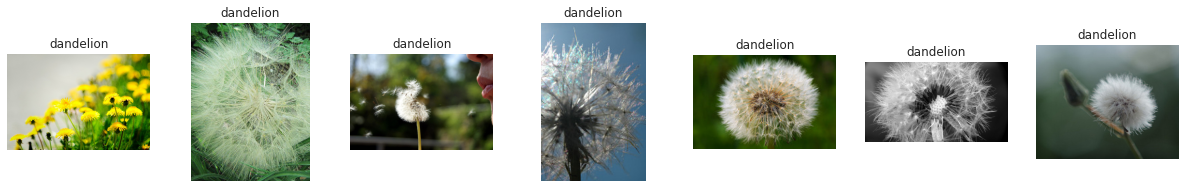

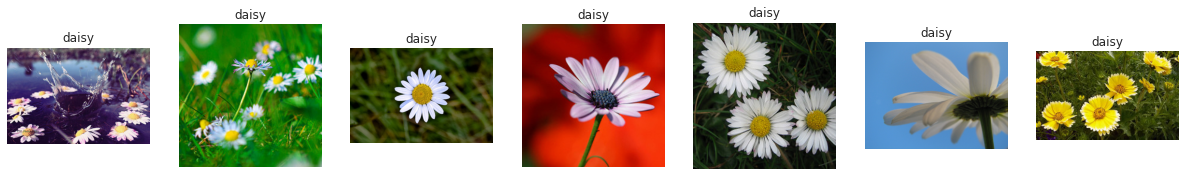

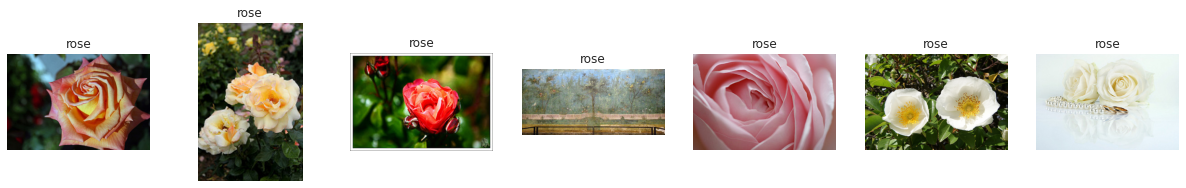

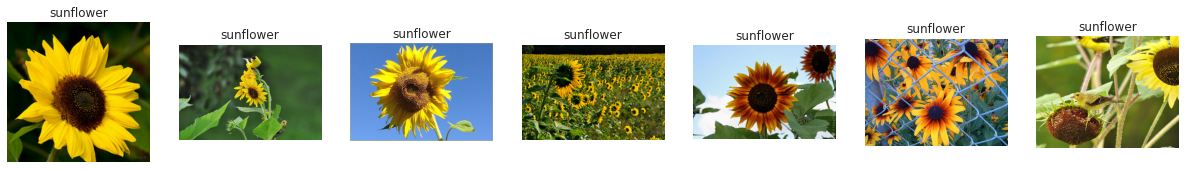

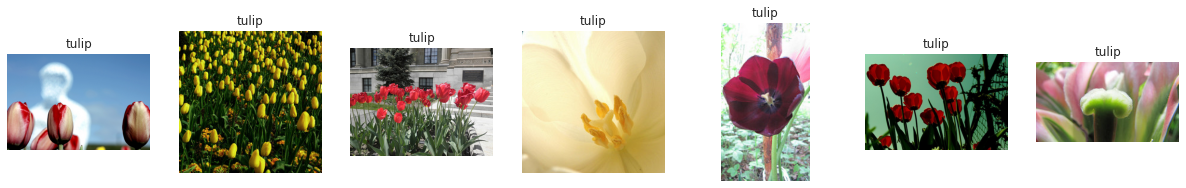

In [10]:
# Plotting each categorie's flowers
plot_flowers(dandelion, 'dandelion')
plot_flowers(daisy, 'daisy')
plot_flowers(rose, 'rose')
plot_flowers(sunflower, 'sunflower')
plot_flowers(tulip, 'tulip')

- You can see that each image has a different size.
- Data preprocessing resizes all data.

## 2. Data Preprocessing


---
- Resize the data
- Create Labels
- Shuffle the dataset
- Train, Validation, Test split
- Normalization
- Data Augmentation



## (1) Resize the data

In [11]:
# Define function that loading the data
labels = ['rose','daisy','dandelion', 'sunflower','tulip']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [12]:
# load the data
data = get_data("/content/drive/MyDrive/flowers")

<ipython-input-11-3e9a3c69f8ec>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


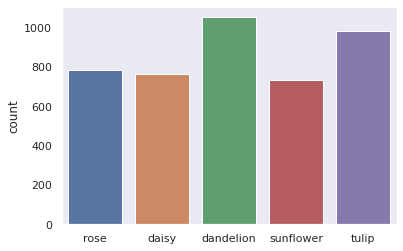

In [13]:
# visualize the distribution of data
l = []
for i in data:
    l.append(labels[i[1]])
sns.set_style('dark')
sns.countplot(l)

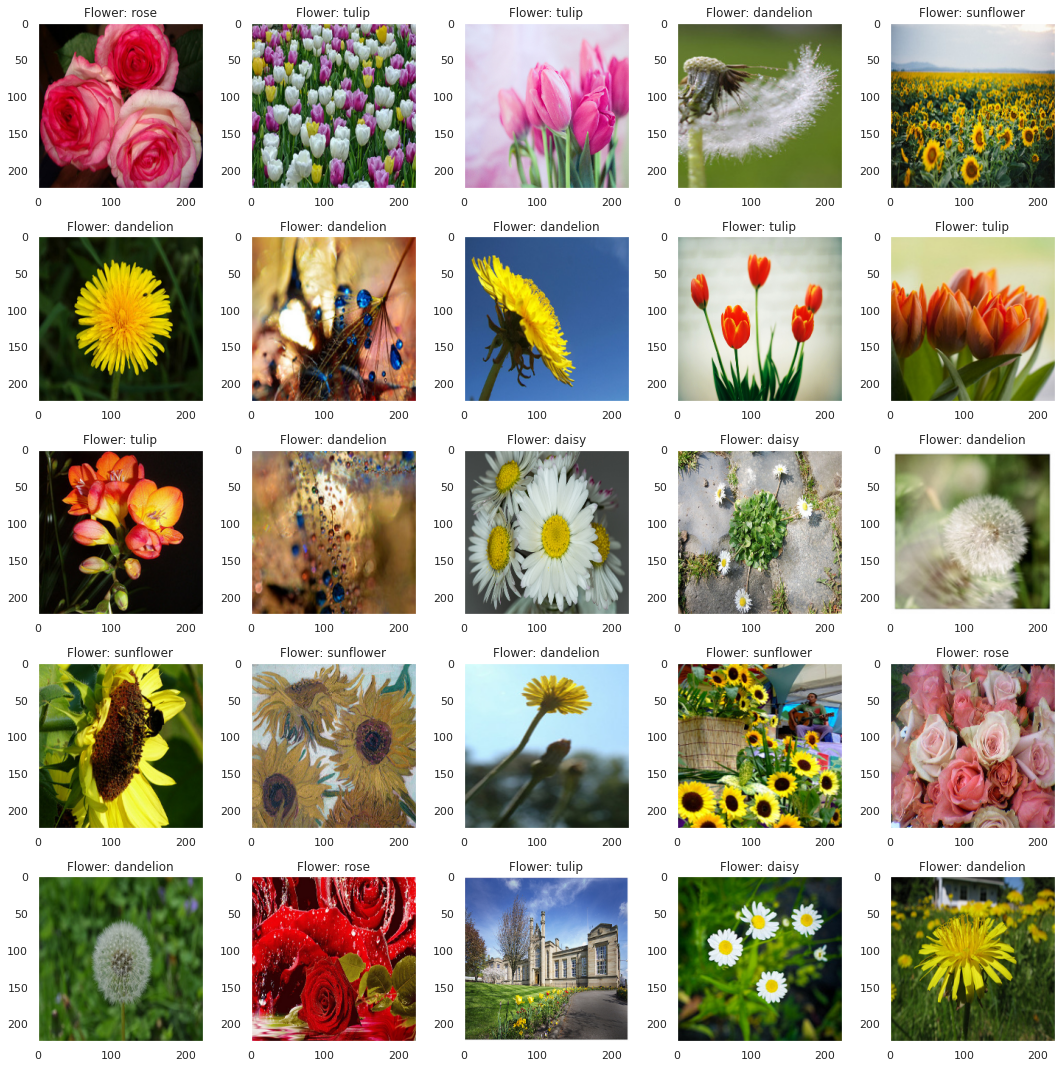

In [14]:
# Visualize the resized data
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=random.randint(0,len(data))
        ax[i,j].imshow(cv2.cvtColor(data[l][0], cv2.COLOR_BGR2RGB))
        ax[i,j].set_title('Flower: '+labels[data[l][1]])


plt.tight_layout()

- I confirmed that I resized the data to 224x224

## (2) Create Labels

In [15]:
#Create a dictonary contains all the images of each category
flowers_images_dict = {
    'rose': rose,
    'daisy':daisy,
    'dandelion':dandelion,
    'sunflower':sunflower,
    'tulip': tulip,
}


#Create an other dictionary to associate each category to a integer number  
flowers_labels_dict = {
    'rose': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflower': 3,
    'tulip': 4,
}

In [16]:
# Split data into X,y -> X : resized image data, y : labels of data

X, y = [], []

for flower_name, data in flowers_images_dict.items():
    for image in data:
        #img = cv2.imread(str(image))
        resized_img = cv2.resize(image,(img_size,img_size))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
        

## (3) Shuffle the data

In [17]:
# Combine X, y to shuffle 
all_data = []
for img, categ in zip(X, y):
    all_data.append([img, categ])

In [18]:
#Suffle the Data
random.shuffle(all_data)

In [19]:
# Split data after shuffling
X, y = [], []

for img, label in all_data :
    X.append(img)
    y.append(label)

In [20]:
# Convert X,y into numpy arraay
X = np.array(X)
y = np.array(y)

## (4) Train, Validation, Test Split

In [21]:
# Splitting X, y into train and test sets for deep learning model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

# Splitting training model into train and validation sets for deep learning model
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

In [22]:
# Check the shape
print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('X_val shape :',X_val.shape)

X_train shape : (2762, 224, 224, 3)
X_test shape : (864, 224, 224, 3)
X_val shape : (691, 224, 224, 3)


In [23]:
# Check the shape
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)
print('y_val shape :',y_val.shape)

y_train shape : (2762,)
y_test shape : (864,)
y_val shape : (691,)


## (5) Normalization

In [24]:
# Rescaling data to fall between 0 and 1
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

In [25]:
from tensorflow.keras.utils import to_categorical

# Categorizing Ys
y_train_cat = to_categorical(y_train, num_classes=5)
y_val_cat = to_categorical(y_val, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

In [26]:
y_train

array([2, 4, 4, ..., 0, 1, 2])

In [27]:
y_train_cat

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [28]:
# Check the shape
print('y_train_cat shape :',y_train_cat.shape)
print('y_test_cat shape :',y_test_cat.shape)
print('y_val_cat shape :',y_val_cat.shape)

y_train_cat shape : (2762, 5)
y_test_cat shape : (864, 5)
y_val_cat shape : (691, 5)


## (6) Data Augmentation

In [29]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=15,  # randomly rotate images in the range 15 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.15,  # randomly shift images horizontally 15%
        height_shift_range=0.15,  # randomly shift images vertically 15%
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

## 3. Applying Deep Learning Models


---


- Baseline Model : CNN
- Model 1 : ResNet50
- Model 2 : MobileNet

## (1) Baseline Model : CNN

In [30]:
# Bseline Model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

In [31]:
# model compile
input_shape = (None, 224, 224, 3)
model.build(input_shape)
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [32]:
# validation data for baseline model
X_val_base = X_val.copy()
y_val_cat_base = y_val_cat.copy()

In [33]:
# model learning
history = model.fit(X_train, y_train_cat, batch_size = 16, epochs = 25, verbose = 1, validation_data = (X_val_base, y_val_cat_base))

Epoch 1/25
173/173 [==============================] - 306s 2s/step - loss: 1.4570 - acc: 0.4236 - val_loss: 1.1353 - val_acc: 0.5355
Epoch 2/25
173/173 [==============================] - 303s 2s/step - loss: 1.0893 - acc: 0.5568 - val_loss: 1.0976 - val_acc: 0.5398
Epoch 3/25
173/173 [==============================] - 304s 2s/step - loss: 0.9399 - acc: 0.6311 - val_loss: 1.0337 - val_acc: 0.5528
Epoch 4/25
173/173 [==============================] - 310s 2s/step - loss: 0.8311 - acc: 0.6763 - val_loss: 1.0114 - val_acc: 0.6136
Epoch 5/25
173/173 [==============================] - 305s 2s/step - loss: 0.6685 - acc: 0.7437 - val_loss: 1.0581 - val_acc: 0.5962
Epoch 6/25
173/173 [==============================] - 309s 2s/step - loss: 0.4839 - acc: 0.8219 - val_loss: 1.1528 - val_acc: 0.6122
Epoch 7/25
173/173 [==============================] - 308s 2s/step - loss: 0.3191 - acc: 0.8928 - val_loss: 1.2757 - val_acc: 0.6107
Epoch 8/25
173/173 [==============================] - 307s 2s/step - 

- Various fine-tuning attempts were made to create a baseline model. Among them, the above model showed the highest accuracy. We also set a maximum of 25 as a limit for the Epoch local environment.

In [34]:
# Save the model
model.save('saved_models/model.hdf5')

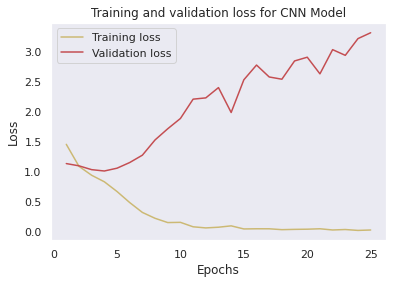

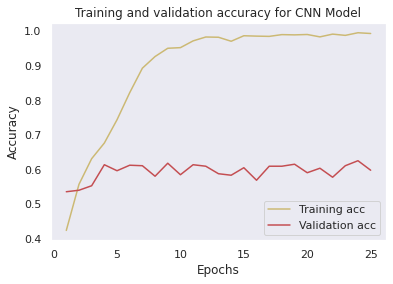

In [35]:
# trainig and validation's accuracy and loss를 graphing per epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- Despite several hyperparameter tuning and various preprocessing attempts, the difference between training and validation Loss and Accuracy was significant each time.
- You may suspect overfitting. This was discussed in '9. Limitations and future solutions and growth plans' at the bottom.

In [36]:
# Apply to test dataset
X_test_base = X_test.copy()
predict = model.predict(X_test_base) 
classes = np.argmax(predict, axis=1)

27/27 [==============================] - 22s 799ms/step


In [37]:
# test accuracy check
y_test_base = y_test.copy()
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_base, classes)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.6145833333333334


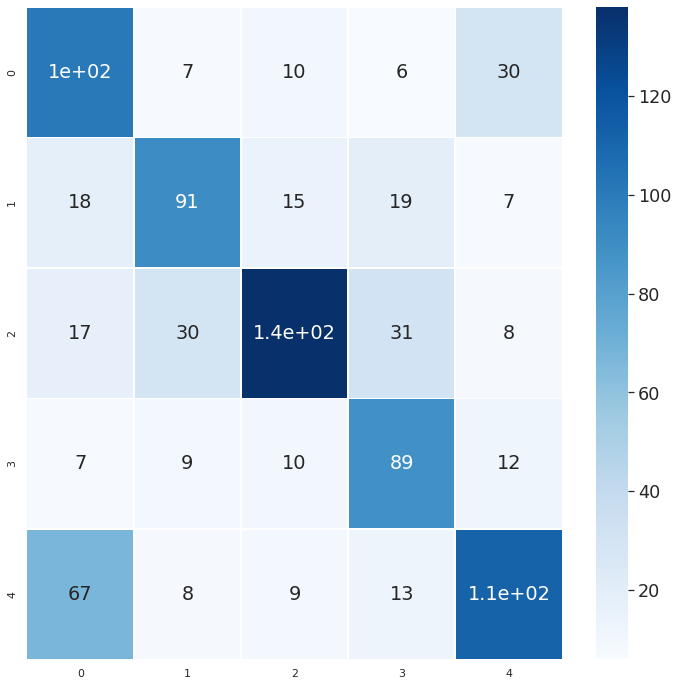

In [38]:
# Confusion matrix
cm_base = confusion_matrix(y_test_base, classes)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm_base, annot=True, cmap='Blues', linewidths=.5, ax=ax);

- Each number means:
  - 0 : rose
  - 1 : daisy
  - 2 : dandelion
  - 3 : sunflower
  - 4 : tulip
  

- Noteworthy is that the correlation between rose and tulip was high. This can increase the chance that the machine will mispredict, since the two flowers are similar in color and shape (green stem, red petals).
- Also, for similar reasons, daisy and dandelion have similar shapes (green grass stalks, white flowers), which makes them more likely to be mispredicted by machines.

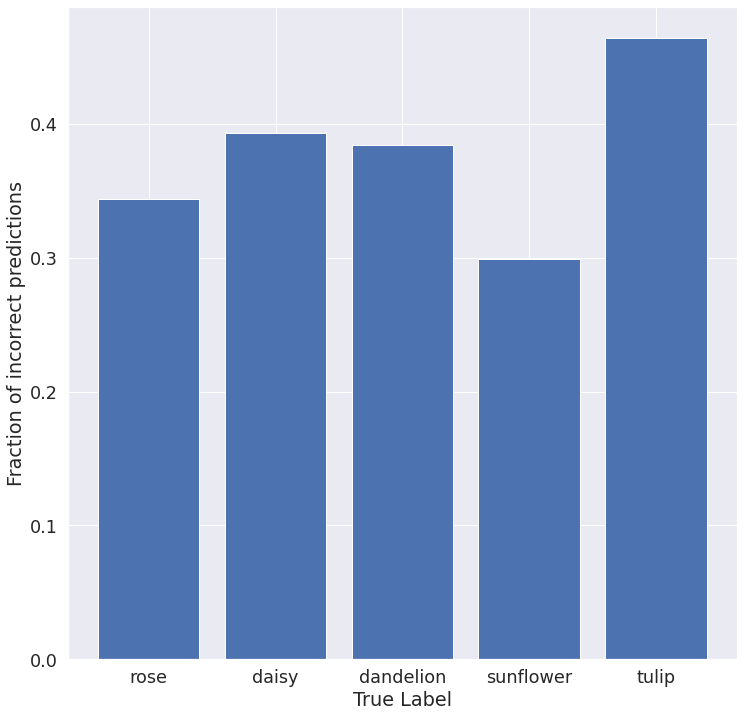

In [39]:
# PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm_base) / np.sum(cm_base, axis=1);
fig, ax = plt.subplots(figsize=(12,12));
plt.bar(np.arange(5), incorr_fraction);
plt.xlabel('True Label');
plt.ylabel('Fraction of incorrect predictions');
plt.xticks(np.arange(5), CATEGORIES);

- Overall, rose and tuplip had high error rates.
- Tulip, which has the highest error rate, has a number close to 0.6.


## (2) Model1 : ResNet50
- I used the ResNet50 model as our first pre-trained model.

In [40]:
# Import ResNet50
from tensorflow.keras.applications import ResNet50

In [41]:
# Define the model1 using ResNet50
IMAGE_SIZE = [224,224]

resnet50_model = ResNet50(input_shape=IMAGE_SIZE + [3], include_top=False, weights='imagenet')
x1 = Flatten()(resnet50_model.output)
# x1 = GlobalAveragePooling2D()(x1)
# x1 = Dense(1024, activation='relu')(x1)
prediction1 = Dense(5, activation='softmax')(x1)
model1 = Model(inputs=resnet50_model.input, outputs=prediction1)

for layer in resnet50_model.layers:
  layer.trainable = False

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

94765736/94765736 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [42]:
# model learning
history1 = model1.fit(X_train, y_train_cat, batch_size = 16, epochs = 25, verbose = 1, validation_data = (X_val, y_val_cat))

Epoch 1/25
173/173 [==============================] - 562s 3s/step - loss: 2.5690 - accuracy: 0.3418 - val_loss: 1.7576 - val_accuracy: 0.4269
Epoch 2/25
173/173 [==============================] - 553s 3s/step - loss: 1.7383 - accuracy: 0.4566 - val_loss: 1.3675 - val_accuracy: 0.4993
Epoch 3/25
173/173 [==============================] - 559s 3s/step - loss: 1.6456 - accuracy: 0.4808 - val_loss: 1.6012 - val_accuracy: 0.4602
Epoch 4/25
173/173 [==============================] - 560s 3s/step - loss: 1.5666 - accuracy: 0.4986 - val_loss: 3.4635 - val_accuracy: 0.4038
Epoch 5/25
173/173 [==============================] - 559s 3s/step - loss: 1.8414 - accuracy: 0.5167 - val_loss: 2.4183 - val_accuracy: 0.4139
Epoch 6/25
173/173 [==============================] - 560s 3s/step - loss: 1.3126 - accuracy: 0.5833 - val_loss: 1.4566 - val_accuracy: 0.5268
Epoch 7/25
173/173 [==============================] - 560s 3s/step - loss: 1.2358 - accuracy: 0.5970 - val_loss: 1.9324 - val_accuracy: 0.5369

In [43]:
# Save the model
model1.save('saved_models/model1.hdf5')

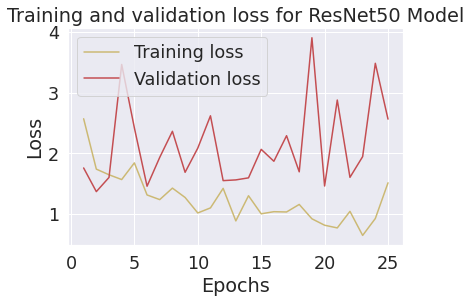

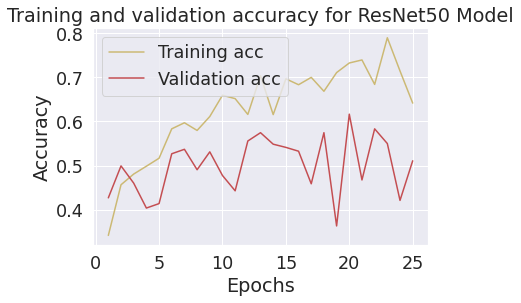

In [44]:
# trainig and validation's accuracy and loss를 graphing per epoch
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss for ResNet50 Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy for ResNet50 Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
# Apply to test dataset
X_test_resnet50 = X_test.copy()
predict1 = model1.predict(X_test_resnet50) 
classes1 = np.argmax(predict1, axis=1)

27/27 [==============================] - 137s 5s/step


In [46]:
# test accuracy check
y_test_resnet50 = y_test.copy()
from sklearn.metrics import accuracy_score
accuracy_resnet50 = accuracy_score(y_test_resnet50, classes1)
print('Accuracy Score = ', accuracy_resnet50)

Accuracy Score =  0.5358796296296297


## (3) Model2 : MobileNet

In [47]:
# Import MoobileNet
from tensorflow.keras.applications.mobilenet import MobileNet

In [ ]:
# from tensorflow.python.framework.ops import disable_eager_execution
# disable_eager_execution()

In [48]:
# Define Model2 using MobileNet
IMAGE_SIZE = [224,224]

mobilenet_model = MobileNet(input_shape=IMAGE_SIZE + [3],include_top=False, weights='imagenet')
x2 = mobilenet_model.output
x2 = GlobalAveragePooling2D()(x2)
x2 = Dense(1024, activation='relu')(x2)
prediction2 = Dense(len(CATEGORIES), activation='softmax')(x2)
model2 = Model(inputs=mobilenet_model.input, outputs=prediction2)

for layer in mobilenet_model.layers:
  layer.trainable = False

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

17225924/17225924 [==============================] - 1s 0us/step


In [49]:
# Summary the model2
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [50]:
# Model2 learning
history2 = model2.fit(X_train, y_train_cat, batch_size = 16, epochs = 25, verbose = 1, validation_data = (X_val, y_val_cat))

Epoch 1/25
173/173 [==============================] - 129s 732ms/step - loss: 0.5698 - accuracy: 0.8092 - val_loss: 0.5524 - val_accuracy: 0.8119
Epoch 2/25
173/173 [==============================] - 124s 720ms/step - loss: 0.2397 - accuracy: 0.9156 - val_loss: 0.4838 - val_accuracy: 0.8509
Epoch 3/25
173/173 [==============================] - 130s 754ms/step - loss: 0.1341 - accuracy: 0.9562 - val_loss: 0.4409 - val_accuracy: 0.8582
Epoch 4/25
173/173 [==============================] - 126s 730ms/step - loss: 0.0796 - accuracy: 0.9757 - val_loss: 0.5906 - val_accuracy: 0.8408
Epoch 5/25
173/173 [==============================] - 128s 740ms/step - loss: 0.0621 - accuracy: 0.9808 - val_loss: 0.4710 - val_accuracy: 0.8741
Epoch 6/25
173/173 [==============================] - 129s 747ms/step - loss: 0.0269 - accuracy: 0.9920 - val_loss: 0.5144 - val_accuracy: 0.8669
Epoch 7/25
173/173 [==============================] - 126s 729ms/step - loss: 0.0127 - accuracy: 0.9989 - val_loss: 0.5311 -

In [51]:
# Save the model2
model2.save('saved_models/model2.hdf5')

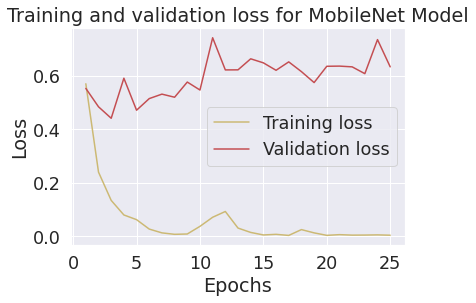

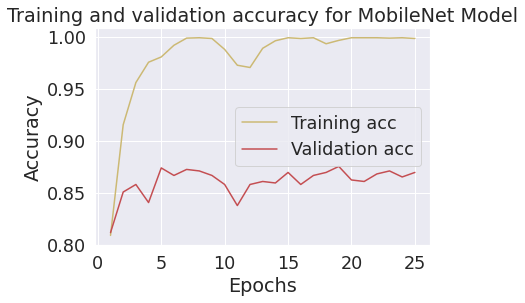

In [52]:
# trainig and validation's accuracy and loss를 graphing per epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss for MobileNet Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy for MobileNet Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
# Apply to test dataset
predict2 = model2.predict(X_test) 
classes2 = np.argmax(predict2, axis=1)

27/27 [==============================] - 32s 1s/step


In [54]:
# test accuracy check
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, classes2)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.8819444444444444


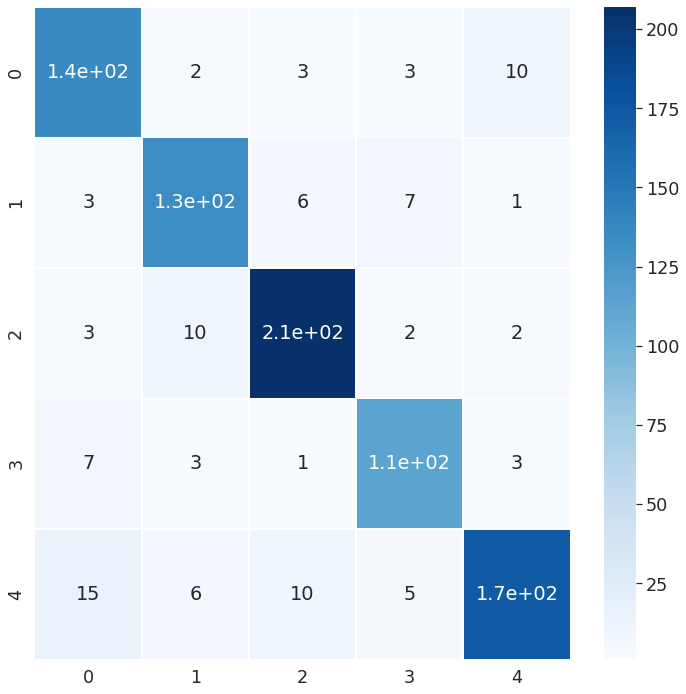

In [55]:
# Confusion matrix
cm = confusion_matrix(y_test, classes2)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, cmap='Blues', linewidths=.5, ax=ax);

- Each number means:
  - 0 : rose
  - 1 : daisy
  - 2 : dandelion
  - 3 : sunflower
  - 4 : tulip

- Noteworthy is that the correlation between rose and tulip was high. This can increase the chance that the machine will mispredict, since the two flowers are similar in color and shape (green stem, red petals).
- Also, for similar reasons, daisy and dandelion have similar shapes (green grass stalks, white flowers), which makes them more likely to be mispredicted by machines.

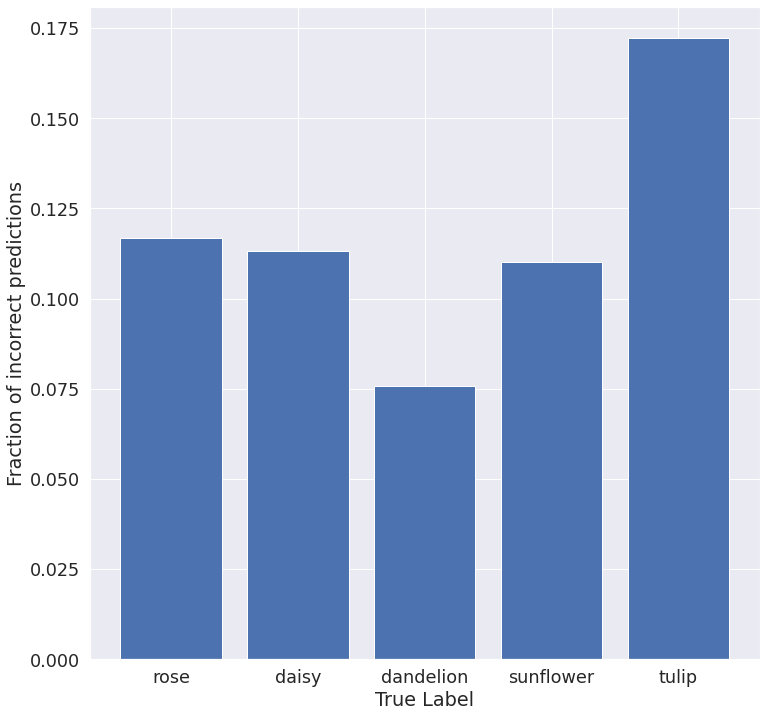

In [56]:
# PLot fractional incorrect misclassifications
incorr_fraction2 = 1 - np.diag(cm) / np.sum(cm, axis=1);
fig, ax = plt.subplots(figsize=(12,12));
plt.bar(np.arange(5), incorr_fraction2);
plt.xlabel('True Label');
plt.ylabel('Fraction of incorrect predictions');
plt.xticks(np.arange(5), CATEGORIES);

- Overall, it can be seen that rose, sunflower, and tulip have high error rates.
- However, when compared to the error graph of the baseline model, it can be seen that the overall error rate is lower.

## 4. Chance Level & Base Line


---



In [57]:
# Chance level of the data
chance_level = 1/5 * 100
print(chance_level, '%')

20.0 %


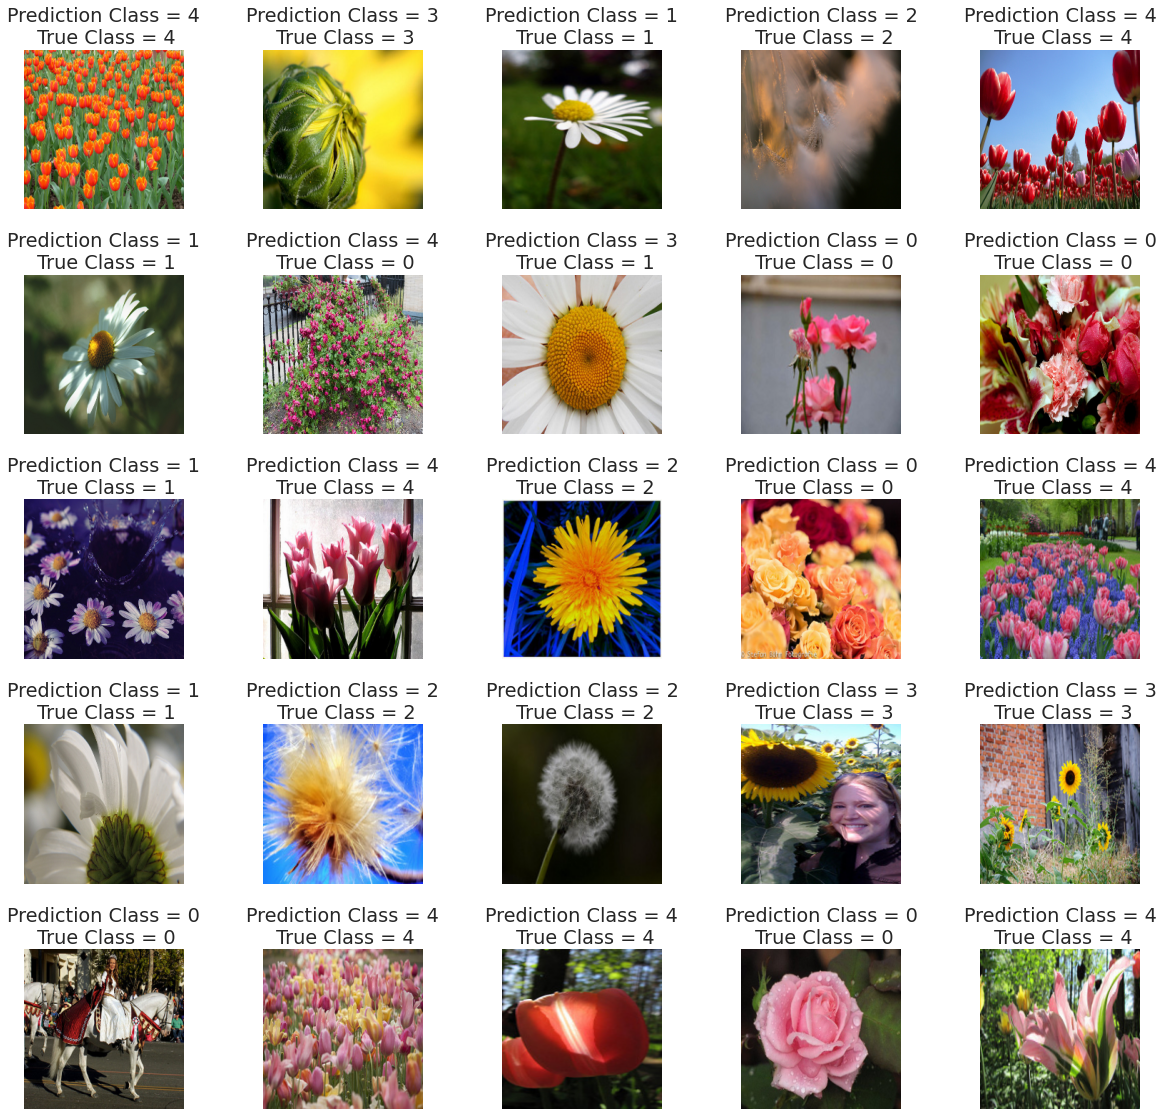

In [58]:
# Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB), cmap=plt.cm.binary)
    axes[i].set_title(f"Prediction Class = {classes2[i]}\n True Class = {y_test[i]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

## 8. Hypothesis Testing


---


>Hypothesis 1: Deep learning can classify flower images into 5 classes, and the accuracy is over 70%.

- With the MobileNet model, which is a pre-trained model, we were able to achieve about 90% accuracy. Therefore, Hypothesis 1 could be tested.

>Hypothesis 2: There are differences in the results after applying various pre-learning models.

- ResNet50 accuracy: 0.4849537037037037 (about 48.5%)
- MobileNet Accuracy: 0.9004629629629629 (about 90%)
- Therefore, it can be seen that there are differences in the results of the pre-trained models as well.

## 9. Limitations and future solutions and growth plans


---



>Limitation

- Local environment: The more I learned about deep learning, the more I was disappointed with the limited local environment. That was also the case with this project. The data had to be changed three times, and it took a considerable amount of time to learn even with the final selected data. I think the opportunity to do a project with more complex and diverse classes of big data will come soon.
- Limitations of the data: First, the number of data was about 4300 and the model classified 5 classes. If the number of data is larger and the classes are more diverse, it would have been possible to classify more diverse types of flowers. However, when I actually tried using larger image data, it didn't work in the local environment, so I think it was appropriate for this project data.
- Overfitting: In the baseline model, Convolutional Neural Network (CNN), there was a big difference in accuracy and loss between training and validation. I suspect overfitting. There could be several reasons for this.
  - limited number of data
  - Epoch of limited size, Batch_size
  - complexity of the model
- I tried various modeling through hyperparameter tuning several times, but each time showed a tendency to overfit to some extent. I guess the limited number of data is the biggest reason. However, as I mentioned earlier, I think it is a part that should be taken into account because I chose the data that can make the most of my local environment.






>Solution and growth plan

- Recognizing a natural object as a single photograph and providing information to a machine will bring great innovation in education. These days, when everyone has a smartphone, if you can see and take a picture of a flower or plant and know that information right away, your understanding of learning will increase. Anyone can easily understand and study plants even if they do not have the knowledge of a botanist.
- Furthermore, if a machine can recognize and give information to all natural creatures, not just flowers, but also plants and animals in a single photo, everyone will have an equal opportunity to study natural creatures. To achieve this, the following growth plan is required.
  - Massive data on more natural creatures and the resources and environments that can handle that data
  - A web app or mobile app built with a model trained on that data
- It may be difficult in the local environment, but if the above conditions are met, I think the app is a program that can help many people educationally.

